In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [10]:
data = pd.read_csv('Samsung_Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [11]:
data.shape

(6127, 7)

In [12]:
split_point = int(len(data) * 0.8)
train, test = data[:split_point], data[split_point:]

In [13]:
model = auto_arima(train['Close'], start_p=1, start_q=1,
                   test='adf',       # sử dụng ADF test để xác định d
                   max_p=10, max_q=10, # giới hạn tối đa của p và q
                   m=1,              # tần suất chu kỳ của dữ liệu
                   d=None,           # để auto_arima quyết định d
                   seasonal=False,   # không có tính mùa vụ
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=72453.214, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72462.446, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=72460.630, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=72460.278, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=72462.492, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=72430.257, Time=3.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=72452.812, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=72430.045, Time=2.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=72433.952, Time=0.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=72431.301, Time=3.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=72432.234, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=72429.709, Time=6.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=72431.953, Time=3.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=72432.376, Time=4.32 sec
 ARIMA(1,1,3)(0,0,0

In [14]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4901
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -36208.854
Date:                Tue, 20 Aug 2024   AIC                          72429.709
Time:                        10:29:52   BIC                          72468.691
Sample:                             0   HQIC                         72443.385
                               - 4901                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9351      1.821      1.612      0.107      -0.633       6.504
ar.L1          0.9418      0.117      8.057      0.000       0.713       1.171
ar.L2         -0.3071      0.105     -2.928      0.0

In [15]:
model = ARIMA(train['Close'], order=(2,1,2), seasonal_order=(0,0,0,0))
model_fit = model.fit()


In [16]:
forecast = model_fit.forecast(steps=len(test))
print(forecast)

4901    45435.270801
4902    45359.072246
4903    45307.703639
4904    45283.270617
4905    45276.385765
            ...     
6122    45285.325056
6123    45285.325056
6124    45285.325056
6125    45285.325056
6126    45285.325056
Name: predicted_mean, Length: 1226, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Close'], forecast)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)


Mean Squared Error: 545956092.8316324
Root Mean Squared Error: 23365.70334553686
Mean Absolute Error: 20608.97117427133


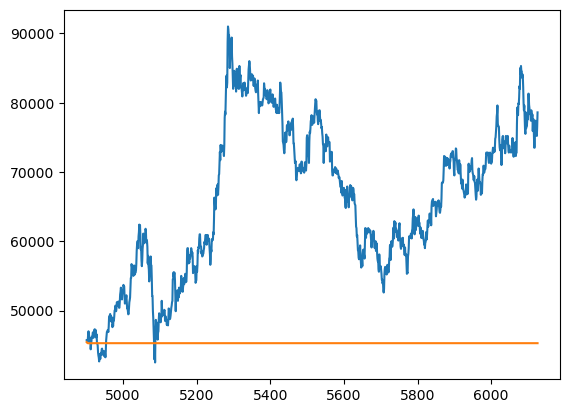

In [19]:
plt.plot(test['Close'], label = 'True')
plt.plot(forecast, label = 'Predicted')
plt.show()

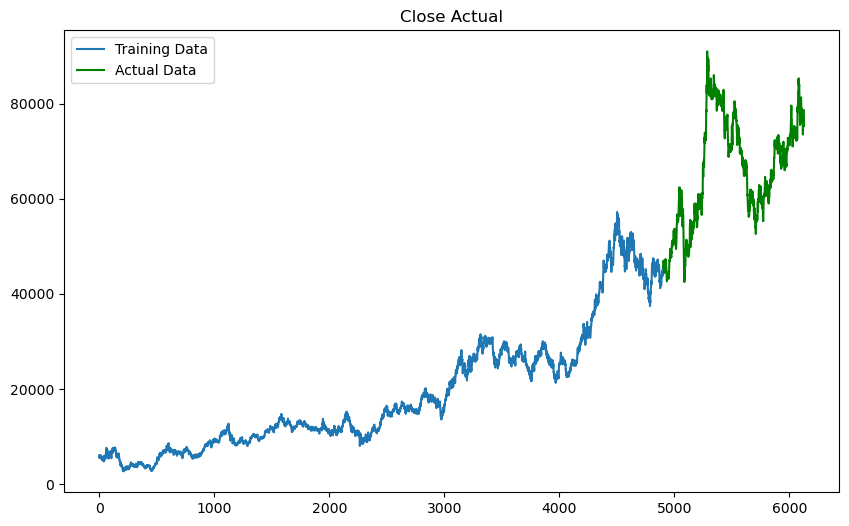

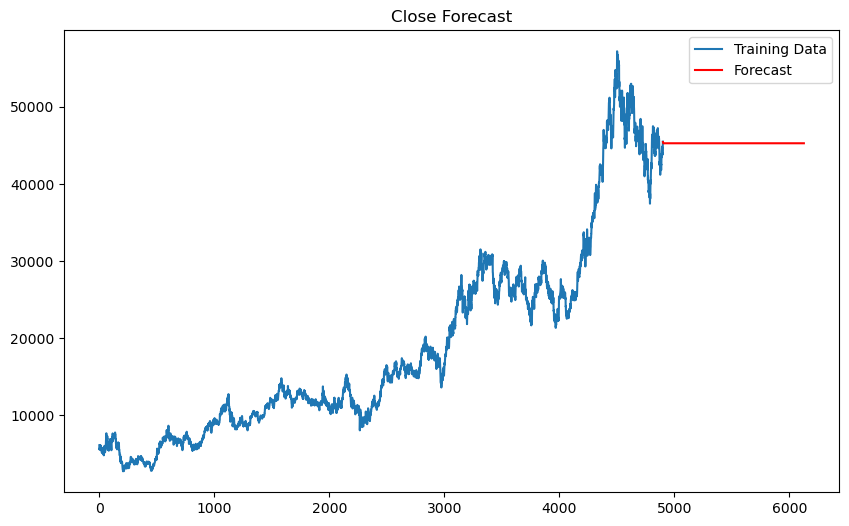

In [20]:
plt.figure(figsize=(10,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Data', color='green')
plt.title('Close Actual')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Close Forecast')
plt.legend()
plt.show()